<a href="https://colab.research.google.com/github/SergeyHSE/k_NN.github.io/blob/main/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
X.shape, y.shape

((1000, 2), (1000,))

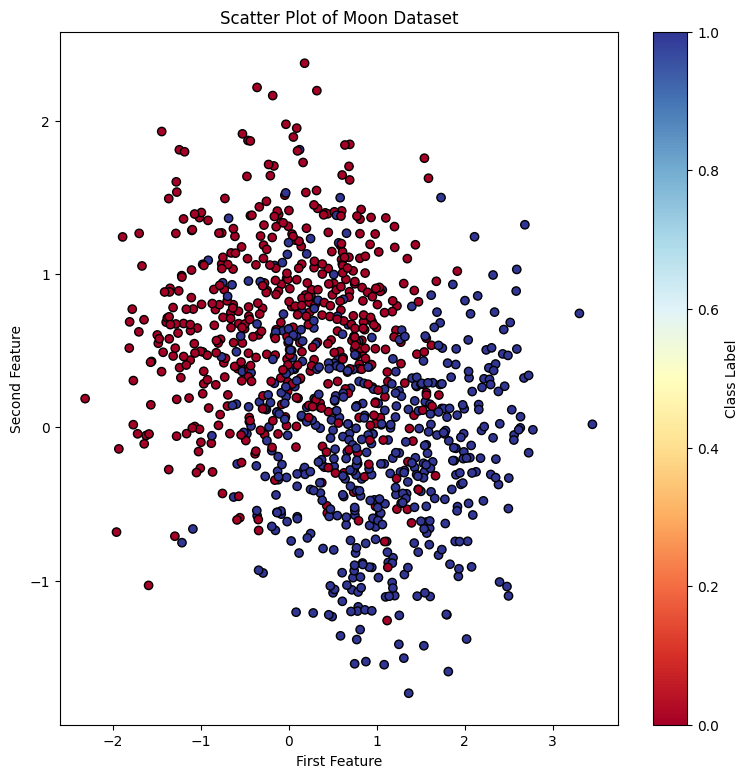

In [3]:
plt.figure(figsize=(9, 9), dpi=100)
ax = plt.gca()
scatter = ax.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title('Scatter Plot of Moon Dataset')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Class Label')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=10)

In [5]:
grid_searcher1 = GridSearchCV(KNeighborsClassifier(),
                              param_grid = {'n_neighbors' : [i for i in range(1, 21)],
                                            'weights' : ['uniform', 'distance'],
                                            'p' : [1, 2 ,3]},
                              cv = KFold(n_splits=5, random_state=10, shuffle=True))

In [6]:
grid_searcher1.fit(X_train, y_train)
grid_searcher1.best_params_
y_pred = grid_searcher1.predict(X_test)

In [7]:
mean_squared_error(y_test, y_pred)

0.2

In [8]:
# Let's write Accuracy score metrix

def accuracy(y_t, y_p):
    count_of_correct_pred = 0
    for i in range(len(y_t)):
        if y_t[i] == y_p[i]:
            count_of_correct_pred += 1
    accuracy_score = count_of_correct_pred / len(y_t)
    return accuracy_score